# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a public S3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.new.tsv ---> Name Basics
* s3://cis9760-lecture9-movieanalysis/title.basic.new.tsv ---> Title Basics
* s3://cis9760-lecture9-movieanalysis/title.principles.new.tsv ---> Title Principles
* s3://cis9760-lecture9-movieanalysis/title.ratings.new.tsv ---> Title Ratings

Please disregard "Error displaying widget: model not found" or "VBox()" messages on each ouput. They are not part of the output.

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Ensure that the session is active.

In [1]:
%%info

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1741648188377_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Not uninstalling python-dateutil at /usr/lib/python3.9/site-packages, outside environment /mnt/yarn/usercache/livy/appcache/application_1741648188377_0001/container_1741648188377_0001_01_000001/tmp/spark-902e3f49-16fb-4d0d-84ed-93deaf114159
    Can't uninstall 'python-dateutil'. No files were found to uninstall.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 2.17.18 requires python-dateutil<=2.8.2,>=2.1, but you have python-dateutil 2.9.0.post0 which is incompatible.


In [2]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("matplotlib")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1743893430397_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Not uninstalling python-dateutil at /usr/lib/python3.9/site-packages, outside environment /mnt/yarn/usercache/livy/appcache/application_1743893430397_0002/container_1743893430397_0002_01_000001/tmp/spark-65c0434c-3f16-42cd-9607-9a3ce54fdc23
    Can't uninstall 'python-dateutil'. No files were found to uninstall.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 2.17.18 requires python-dateutil<=2.8.2,>=2.1, but you have python-dateutil 2.9.0.post0 which is incompatible.


Now, import the installed packages from the previous block below.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# The data comes from https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
# You will read it from my publicly available bucket.
# This will be the same dataset that you'll use for your project.
name = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.new.tsv', sep=r'\t', header=True)
titles = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basic.new.tsv', sep=r'\t', header=True, nullValue='\\N')
principles = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principles.new.tsv', sep=r'\t', header=True)
ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.new.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Name Basics

Display the schema below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

In [5]:
name.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 15 rows with the following columns:

* `nconst`
* `primaryName`
* `primaryProfession`
* `birthYear`

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------+-------------------------------------+---------+
|nconst   |primaryName        |primaryProfession                    |birthYear|
+---------+-------------------+-------------------------------------+---------+
|nm0000001|Fred Astaire       |soundtrack,actor,miscellaneous       |1899     |
|nm0000002|Lauren Bacall      |actress,soundtrack                   |1924     |
|nm0000003|Brigitte Bardot    |actress,soundtrack,music_department  |1934     |
|nm0000004|John Belushi       |actor,soundtrack,writer              |1949     |
|nm0000005|Ingmar Bergman     |writer,director,actor                |1918     |
|nm0000006|Ingrid Bergman     |actress,soundtrack,producer          |1915     |
|nm0000007|Humphrey Bogart    |actor,soundtrack,producer            |1899     |
|nm0000008|Marlon Brando      |actor,soundtrack,director            |1924     |
|nm0000009|Richard Burton     |actor,soundtrack,producer            |1925     |
|nm0000010|James Cagney       |actor,sou

In [6]:
name.select("nconst", "primaryName", "primaryProfession", "birthYear").show(15, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------+-------------------------------------+---------+
|nconst   |primaryName        |primaryProfession                    |birthYear|
+---------+-------------------+-------------------------------------+---------+
|nm0000001|Fred Astaire       |soundtrack,actor,miscellaneous       |1899     |
|nm0000002|Lauren Bacall      |actress,soundtrack                   |1924     |
|nm0000003|Brigitte Bardot    |actress,soundtrack,music_department  |1934     |
|nm0000004|John Belushi       |actor,soundtrack,writer              |1949     |
|nm0000005|Ingmar Bergman     |writer,director,actor                |1918     |
|nm0000006|Ingrid Bergman     |actress,soundtrack,producer          |1915     |
|nm0000007|Humphrey Bogart    |actor,soundtrack,producer            |1899     |
|nm0000008|Marlon Brando      |actor,soundtrack,director            |1924     |
|nm0000009|Richard Burton     |actor,soundtrack,producer            |1925     |
|nm0000010|James Cagney       |actor,sou

## Title Basics

Display the first 5 rows with the following columns:
    
* `tconst`    
* `titleType`
* `primaryTitle`
* `genres`

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+----------------------+------------------------+
|tconst   |titleType|primaryTitle          |genres                  |
+---------+---------+----------------------+------------------------+
|tt0000001|short    |Carmencita            |Documentary,Short       |
|tt0000002|short    |Le clown et ses chiens|Animation,Short         |
|tt0000003|short    |Pauvre Pierrot        |Animation,Comedy,Romance|
|tt0000004|short    |Un bon bock           |Animation,Short         |
|tt0000005|short    |Blacksmith Scene      |Comedy,Short            |
+---------+---------+----------------------+------------------------+
only showing top 5 rows

In [7]:
titles.select("tconst", "titleType", "primaryTitle", "genres").show(5, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+----------------------+------------------------+
|tconst   |titleType|primaryTitle          |genres                  |
+---------+---------+----------------------+------------------------+
|tt0000001|short    |Carmencita            |Documentary,Short       |
|tt0000002|short    |Le clown et ses chiens|Animation,Short         |
|tt0000003|short    |Pauvre Pierrot        |Animation,Comedy,Romance|
|tt0000004|short    |Un bon bock           |Animation,Short         |
|tt0000005|short    |Blacksmith Scene      |Comedy,Short            |
+---------+---------+----------------------+------------------------+
only showing top 5 rows

Display the unique title types below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|titleType   |
+------------+
|tvSeries    |
|tvMiniSeries|
|movie       |
|videoGame   |
|tvSpecial   |
|video       |
|tvMovie     |
|tvEpisode   |
|tvShort     |
|short       |
|tvPilot     |
+------------+

In [8]:
titles.select("titleType").distinct().show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|titleType   |
+------------+
|tvSeries    |
|tvMiniSeries|
|movie       |
|videoGame   |
|tvSpecial   |
|video       |
|tvMovie     |
|tvEpisode   |
|tvShort     |
|short       |
|tvPilot     |
+------------+

Display the schema below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

In [9]:
titles.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

Remove the 'originalTitle' from the dataframe and display the schema to verify it.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

In [10]:
titles = titles.drop("originalTitle")
titles.printSchema()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Title Principles

Display the schema below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [11]:
principles.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 15 rows where the "category" column is "producer"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+--------+----------+
|tconst   |ordering|nconst   |category|job     |characters|
+---------+--------+---------+--------+--------+----------+
|tt0000003|2       |nm1770680|producer|producer|\N        |
|tt0000005|4       |nm0249379|producer|producer|\N        |
|tt0000007|5       |nm0249379|producer|producer|\N        |
|tt0000020|2       |nm0666972|producer|producer|\N        |
|tt0000024|4       |nm0666972|producer|producer|\N        |
|tt0000025|2       |nm0666972|producer|producer|\N        |
|tt0000039|1       |nm0666972|producer|producer|\N        |
|tt0000041|2       |nm0525908|producer|producer|\N        |
|tt0000061|3       |nm0666972|producer|producer|\N        |
|tt0000089|3       |nm0525910|producer|producer|\N        |
|tt0000104|1       |nm0525910|producer|producer|\N        |
|tt0000121|5       |nm0666972|producer|producer|\N        |
|tt0000125|1       |nm0666972|producer|producer|\N        |
|tt0000147|6       |nm0103755|producer|p

In [12]:
principles.filter(principles.category == "producer").show(15, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+--------+----------+
|tconst   |ordering|nconst   |category|job     |characters|
+---------+--------+---------+--------+--------+----------+
|tt0000003|2       |nm1770680|producer|producer|\N        |
|tt0000005|4       |nm0249379|producer|producer|\N        |
|tt0000007|5       |nm0249379|producer|producer|\N        |
|tt0000020|2       |nm0666972|producer|producer|\N        |
|tt0000024|4       |nm0666972|producer|producer|\N        |
|tt0000025|2       |nm0666972|producer|producer|\N        |
|tt0000039|1       |nm0666972|producer|producer|\N        |
|tt0000041|2       |nm0525908|producer|producer|\N        |
|tt0000061|3       |nm0666972|producer|producer|\N        |
|tt0000089|3       |nm0525910|producer|producer|\N        |
|tt0000104|1       |nm0525910|producer|producer|\N        |
|tt0000121|5       |nm0666972|producer|producer|\N        |
|tt0000125|1       |nm0666972|producer|producer|\N        |
|tt0000147|6       |nm0103755|producer|p

## Title Ratings

Display the schema below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

In [13]:
ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0111161|          9.3| 2868594|
|tt0468569|          9.0| 2850372|
|tt1375666|          8.8| 2531543|
|tt0137523|          8.8| 2303989|
|tt0944947|          9.2| 2265760|
|tt0109830|          8.8| 2239746|
|tt0110912|          8.9| 2203191|
|tt0903747|          9.5| 2114358|
|tt0816692|          8.7| 2073181|
|tt0133093|          8.7| 2038364|
+---------+-------------+--------+
only showing top 10 rows

In [14]:
from pyspark.sql.functions import col

ratings.select("tconst", "averageRating", "numVotes") \
    .withColumn("numVotes", col("numVotes").cast("int")) \
    .sort(col("numVotes").desc()) \
    .show(10, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|tconst   |averageRating|numVotes|
+---------+-------------+--------+
|tt0111161|9.3          |2868594 |
|tt0468569|9.0          |2850372 |
|tt1375666|8.8          |2531543 |
|tt0137523|8.8          |2303989 |
|tt0944947|9.2          |2265760 |
|tt0109830|8.8          |2239746 |
|tt0110912|8.9          |2203191 |
|tt0903747|9.5          |2114358 |
|tt0816692|8.7          |2073181 |
|tt0133093|8.7          |2038364 |
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data

Display the number of rows and columns in each dataFrame object.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Name Basics table: 6
Number of rows in Name Basics table: 13329316

Number of columns in Title Basics table: 8
Number of rows in Title Basics table: 10613322

Number of columns in Title Principles table: 6
Number of rows in Title Principles table: 60833800

Number of columns in Title Ratings table: 3
Number of rows in Title Ratings table: 1412275

In [15]:
dataframes = {
    "Name Basics": name,
    "Title Basics": titles,
    "Title Principles": principles,
    "Title Ratings": ratings
}

for name, df in dataframes.items():
    print(f"Number of columns in {name} table: {len(df.columns)}")
    print(f"Number of rows in {name} table: {df.count()}\n")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Name Basics table: 6
Number of rows in Name Basics table: 13329316

Number of columns in Title Basics table: 8
Number of rows in Title Basics table: 10613322

Number of columns in Title Principles table: 6
Number of rows in Title Principles table: 60833800

Number of columns in Title Ratings table: 3
Number of rows in Title Ratings table: 1412275

# PART 2 - Analyzing Movie Genres

Let's now answer this question: how many unique movie genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

First, derive the table with the following columns:

* `tconst`    
* `titleType`
* `genres`

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+------------------------+
|tconst   |titleType|genres                  |
+---------+---------+------------------------+
|tt0000001|short    |Documentary,Short       |
|tt0000002|short    |Animation,Short         |
|tt0000003|short    |Animation,Comedy,Romance|
|tt0000004|short    |Animation,Short         |
|tt0000005|short    |Comedy,Short            |
|tt0000006|short    |Short                   |
|tt0000007|short    |Short,Sport             |
|tt0000008|short    |Documentary,Short       |
|tt0000009|movie    |Romance                 |
|tt0000010|short    |Documentary,Short       |
|tt0000011|short    |Documentary,Short       |
|tt0000012|short    |Documentary,Short       |
|tt0000013|short    |Documentary,Short       |
|tt0000014|short    |Comedy,Short            |
|tt0000015|short    |Animation,Short         |
+---------+---------+------------------------+
only showing top 15 rows

In [16]:
titles.select("tconst", "titleType", "genres").show(15, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+------------------------+
|tconst   |titleType|genres                  |
+---------+---------+------------------------+
|tt0000001|short    |Documentary,Short       |
|tt0000002|short    |Animation,Short         |
|tt0000003|short    |Animation,Comedy,Romance|
|tt0000004|short    |Animation,Short         |
|tt0000005|short    |Comedy,Short            |
|tt0000006|short    |Short                   |
|tt0000007|short    |Short,Sport             |
|tt0000008|short    |Documentary,Short       |
|tt0000009|movie    |Romance                 |
|tt0000010|short    |Documentary,Short       |
|tt0000011|short    |Documentary,Short       |
|tt0000012|short    |Documentary,Short       |
|tt0000013|short    |Documentary,Short       |
|tt0000014|short    |Comedy,Short            |
|tt0000015|short    |Animation,Short         |
+---------+---------+------------------------+
only showing top 15 rows

Implement the code necessary to derive the table described from the data set. Display the first 25 rows of your association table below

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|tconst   |titleType|Genre      |
+---------+---------+-----------+
|tt0000001|short    |Documentary|
|tt0000001|short    |Short      |
|tt0000002|short    |Animation  |
|tt0000002|short    |Short      |
|tt0000003|short    |Animation  |
|tt0000003|short    |Comedy     |
|tt0000003|short    |Romance    |
|tt0000004|short    |Animation  |
|tt0000004|short    |Short      |
|tt0000005|short    |Comedy     |
|tt0000005|short    |Short      |
|tt0000006|short    |Short      |
|tt0000007|short    |Short      |
|tt0000007|short    |Sport      |
|tt0000008|short    |Documentary|
|tt0000008|short    |Short      |
|tt0000009|movie    |Romance    |
|tt0000010|short    |Documentary|
|tt0000010|short    |Short      |
|tt0000011|short    |Documentary|
|tt0000011|short    |Short      |
|tt0000012|short    |Documentary|
|tt0000012|short    |Short      |
|tt0000013|short    |Documentary|
|tt0000013|short    |Short      |
+---------+---------+-----------+
only showing t

In [17]:
from pyspark.sql.functions import split, explode

# Split the genres column by comma and explode into multiple rows
association_table = titles.select("tconst", "titleType", explode(split("genres", ",")).alias("Genre"))

# Show the first 25 rows
association_table.show(25, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|tconst   |titleType|Genre      |
+---------+---------+-----------+
|tt0000001|short    |Documentary|
|tt0000001|short    |Short      |
|tt0000002|short    |Animation  |
|tt0000002|short    |Short      |
|tt0000003|short    |Animation  |
|tt0000003|short    |Comedy     |
|tt0000003|short    |Romance    |
|tt0000004|short    |Animation  |
|tt0000004|short    |Short      |
|tt0000005|short    |Comedy     |
|tt0000005|short    |Short      |
|tt0000006|short    |Short      |
|tt0000007|short    |Short      |
|tt0000007|short    |Sport      |
|tt0000008|short    |Documentary|
|tt0000008|short    |Short      |
|tt0000009|movie    |Romance    |
|tt0000010|short    |Documentary|
|tt0000010|short    |Short      |
|tt0000011|short    |Documentary|
|tt0000011|short    |Short      |
|tt0000012|short    |Documentary|
|tt0000012|short    |Short      |
|tt0000013|short    |Documentary|
|tt0000013|short    |Short      |
+---------+---------+-----------+
only showing t

## Total Unique Movie Genres

What is the total number of unique movie genres?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

In [18]:
association_table.select("Genre").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

28

What are the unique movie genres?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|Genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|\N         |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

Oops! Something is off!

In [19]:
association_table.select("Genre").distinct().show(truncate=False, n=association_table.select("Genre").distinct().count())


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|Genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|Genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

In [20]:
filter_genre = association_table.filter((association_table.Genre != "") & (association_table.Genre != "\\N"))

filter_genre.select("Genre").distinct().show(truncate=False, n=association_table.select("Genre").distinct().count())


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|Genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (title ratings and title basics) by tconst. Use inner join. You can goolge to find out how join works in PySpark.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    Genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.5|
|Biography|          3.6|
|    Drama|          3.6|
|  History|          3.6|
|    Drama|          6.0|
|    Drama|          5.0|
|  History|          5.0|
|Biography|          6.2|
|    Drama|          6.2|
+---------+-------------+
only showing top 10 rows

In [21]:
from pyspark.sql.functions import col, split, explode, avg

#  Join titles and ratings
titles_with_ratings = titles.join(ratings, on="tconst", how="inner")

#  Filter for movies only
movies_only = titles_with_ratings.filter(col("titleType") == "movie")

#  Explode genres
exploded_genres = movies_only.select(
    explode(split(col("genres"), ",")).alias("Genre"),
    col("averageRating")
)

#  Remove rows with Genre == '\N'
cleaned_genres = exploded_genres.filter(col("Genre") != "\\N")

# Show result
cleaned_genres.show(10, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|Genre    |averageRating|
+---------+-------------+
|Drama    |4.2          |
|Drama    |4.5          |
|Biography|3.6          |
|Drama    |3.6          |
|History  |3.6          |
|Drama    |6.0          |
|Drama    |5.0          |
|History  |5.0          |
|Biography|6.2          |
|Drama    |6.2          |
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

You can goolge to find out how to round values in PySpark.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|Genre      |Rating|
+-----------+------+
|Mystery    |5.847 |
|Musical    |6.187 |
|Action     |5.732 |
|Sport      |6.623 |
|Talk-Show  |6.858 |
|Romance    |6.102 |
|Thriller   |5.613 |
|Reality-TV |6.701 |
|Family     |6.205 |
|Fantasy    |5.898 |
|History    |6.798 |
|Animation  |6.367 |
|Film-Noir  |6.463 |
|Sci-Fi     |5.353 |
|News       |7.203 |
|Drama      |6.248 |
|Documentary|7.216 |
|Western    |5.84  |
|Comedy     |5.906 |
|Crime      |5.985 |
+-----------+------+
only showing top 20 rows

In [22]:
from pyspark.sql.functions import col, split, explode, avg, round

#  Join and filter
titles_with_ratings = titles.join(ratings, on="tconst", how="inner")
movies_only = titles_with_ratings.filter(col("titleType") == "movie")

# Explode genres and clean
exploded_genres = movies_only.select(
    explode(split(col("genres"), ",")).alias("Genre"),
    col("averageRating")
).filter(col("Genre") != "\\N")

#  Aggregate and round the ratings
average_ratings = exploded_genres.groupBy("Genre").agg(
    round(avg("averageRating"), 3).alias("Rating")
)

# Show result
average_ratings.show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|Genre      |Rating|
+-----------+------+
|Mystery    |5.847 |
|Musical    |6.187 |
|Action     |5.732 |
|Sport      |6.623 |
|Talk-Show  |6.858 |
|Romance    |6.102 |
|Thriller   |5.613 |
|Reality-TV |6.701 |
|Family     |6.205 |
|Fantasy    |5.898 |
|History    |6.798 |
|Animation  |6.367 |
|Film-Noir  |6.463 |
|Sci-Fi     |5.353 |
|News       |7.203 |
|Drama      |6.248 |
|Documentary|7.216 |
|Western    |5.84  |
|Comedy     |5.906 |
|Crime      |5.985 |
+-----------+------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|Genre      |Rating|
+-----------+------+
|Documentary|7.216 |
|News       |7.203 |
|Biography  |6.951 |
|Game-Show  |6.88  |
|Talk-Show  |6.858 |
|History    |6.798 |
|Music      |6.755 |
|Reality-TV |6.701 |
|Sport      |6.623 |
|Film-Noir  |6.463 |
|War        |6.403 |
|Animation  |6.367 |
|Drama      |6.248 |
|Family     |6.205 |
|Musical    |6.187 |
|Romance    |6.102 |
|Crime      |5.985 |
|Comedy     |5.906 |
|Fantasy    |5.898 |
|Adventure  |5.866 |
|Mystery    |5.847 |
|Western    |5.84  |
|Action     |5.732 |
|Thriller   |5.613 |
|Adult      |5.554 |
|Sci-Fi     |5.353 |
|Horror     |5.002 |
|Short      |5.0   |
+-----------+------+

In [23]:
from pyspark.sql.functions import col, split, explode, avg, round
#  Filter out '\N', aggregate ratings, and sort in descending order
average_ratings = exploded_genres.filter(col("Genre") != "\\N") \
    .groupBy("Genre") \
    .agg(round(avg("averageRating"), 3).alias("Rating")) \
    .orderBy(col("Rating").desc())

# Step 4: Show all genres 
average_ratings.show(50, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|Genre      |Rating|
+-----------+------+
|Documentary|7.216 |
|News       |7.203 |
|Biography  |6.951 |
|Game-Show  |6.88  |
|Talk-Show  |6.858 |
|History    |6.798 |
|Music      |6.755 |
|Reality-TV |6.701 |
|Sport      |6.623 |
|Film-Noir  |6.463 |
|War        |6.403 |
|Animation  |6.367 |
|Drama      |6.248 |
|Family     |6.205 |
|Musical    |6.187 |
|Romance    |6.102 |
|Crime      |5.985 |
|Comedy     |5.906 |
|Fantasy    |5.898 |
|Adventure  |5.866 |
|Mystery    |5.847 |
|Western    |5.84  |
|Action     |5.732 |
|Thriller   |5.613 |
|Adult      |5.554 |
|Sci-Fi     |5.353 |
|Horror     |5.002 |
|Short      |5.0   |
+-----------+------+

You do not have to match the color and the figure size but all other aspects of the graph should be matched.

You can google to how to add design features to the graph.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

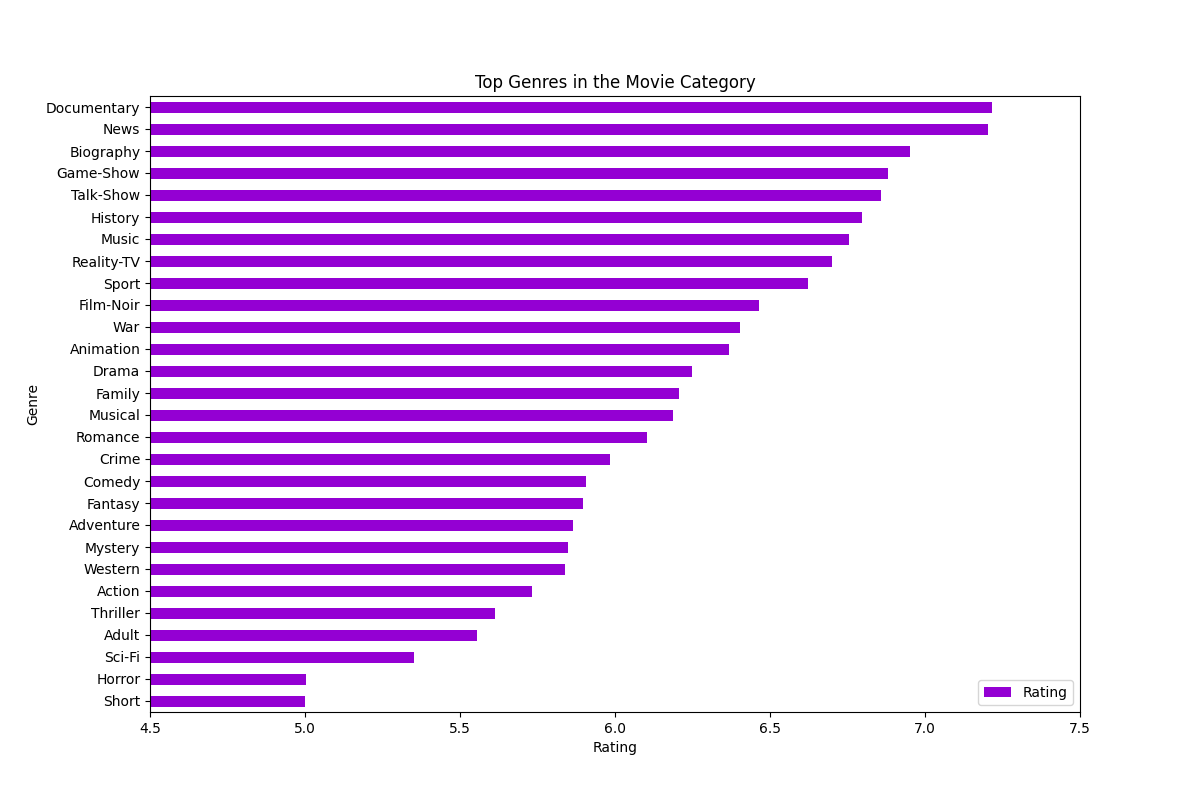

In [24]:
import matplotlib.pyplot as plt
top_genres = average_ratings.toPandas()
top_genres = top_genres. sort_values (by='Rating', ascending=True)
# Manually set y-positions with spacing
spacing = 1.3  # Adjust this to increase space between bars
y_pos = np.arange(len(top_genres)) * spacing
plt.figure(figsize=(10, 6))
plt.barh(top_genres ['Genre'], top_genres ['Rating'], color='purple') 
plt.xlabel('Rating') 
plt.ylabel('Genre')
plt.title('Top Genres in the Movie Category') 
plt.xticks (rotation=45)
plt.xlim(4.5, max(top_genres ['Rating']) + 0.5)


%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
name 'np' is not defined
Traceback (most recent call last):
NameError: name 'np' is not defined



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

What is the total number of unique job categories?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|tconst   |category       |
+---------+---------------+
|tt0000001|self           |
|tt0000001|director       |
|tt0000001|cinematographer|
|tt0000002|director       |
|tt0000002|composer       |
|tt0000003|director       |
|tt0000003|producer       |
|tt0000003|composer       |
|tt0000003|editor         |
|tt0000004|director       |
|tt0000004|composer       |
|tt0000005|actor          |
|tt0000005|actor          |
|tt0000005|director       |
|tt0000005|producer       |
|tt0000006|director       |
|tt0000007|actor          |
|tt0000007|actor          |
|tt0000007|director       |
|tt0000007|director       |
|tt0000007|producer       |
|tt0000008|actor          |
|tt0000008|director       |
|tt0000008|cinematographer|
|tt0000009|actress        |
|tt0000009|actor          |
|tt0000009|actor          |
|tt0000009|director       |
|tt0000010|director       |
|tt0000011|actor          |
+---------+---------------+
only showing top 30 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

In [25]:
principles.select("tconst","category").show(30, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|tconst   |category       |
+---------+---------------+
|tt0000001|self           |
|tt0000001|director       |
|tt0000001|cinematographer|
|tt0000002|director       |
|tt0000002|composer       |
|tt0000003|director       |
|tt0000003|producer       |
|tt0000003|composer       |
|tt0000003|editor         |
|tt0000004|director       |
|tt0000004|composer       |
|tt0000005|actor          |
|tt0000005|actor          |
|tt0000005|director       |
|tt0000005|producer       |
|tt0000006|director       |
|tt0000007|actor          |
|tt0000007|actor          |
|tt0000007|director       |
|tt0000007|director       |
|tt0000007|producer       |
|tt0000008|actor          |
|tt0000008|director       |
|tt0000008|cinematographer|
|tt0000009|actress        |
|tt0000009|actor          |
|tt0000009|actor          |
|tt0000009|director       |
|tt0000010|director       |
|tt0000011|actor          |
+---------+---------------+
only showing top 30 rows

In [43]:
principles.select("category").distinct().count()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

What are the unique job categories available?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

In [44]:
principles.select("category").distinct().show(20, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------+
|category           |count   |
+-------------------+--------+
|actress            |10492210|
|producer           |3944711 |
|production_designer|383761  |
|writer             |8495903 |
|actor              |13443688|
|cinematographer    |2068164 |
|archive_sound      |4794    |
|archive_footage    |404581  |
|self               |10562296|
|editor             |2012800 |
|composer           |2014049 |
|director           |7006843 |
+-------------------+--------+

In [26]:
principles.groupBy("category").count().show(20, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------+
|category           |count   |
+-------------------+--------+
|actress            |10492210|
|producer           |3944711 |
|production_designer|383761  |
|writer             |8495903 |
|actor              |13443688|
|cinematographer    |2068164 |
|archive_sound      |4794    |
|archive_footage    |404581  |
|self               |10562296|
|editor             |2012800 |
|composer           |2014049 |
|director           |7006843 |
+-------------------+--------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------+
|category           |count   |
+-------------------+--------+
|actor              |13443688|
|self               |10562296|
|actress            |10492210|
|writer             |8495903 |
|director           |7006843 |
|producer           |3944711 |
|cinematographer    |2068164 |
|composer           |2014049 |
|editor             |2012800 |
|archive_footage    |404581  |
|production_designer|383761  |
|archive_sound      |4794    |
+-------------------+--------+

In [27]:
principles.groupBy("category").count().orderBy("count", ascending=False).show(20, truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------+
|category           |count   |
+-------------------+--------+
|actor              |13443688|
|self               |10562296|
|actress            |10492210|
|writer             |8495903 |
|director           |7006843 |
|producer           |3944711 |
|cinematographer    |2068164 |
|composer           |2014049 |
|editor             |2012800 |
|archive_footage    |404581  |
|production_designer|383761  |
|archive_sound      |4794    |
+-------------------+--------+

You do not have to match the color and the figure size but all other aspects of the graph should be matched.

Hint: Google limit() in PySpark.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

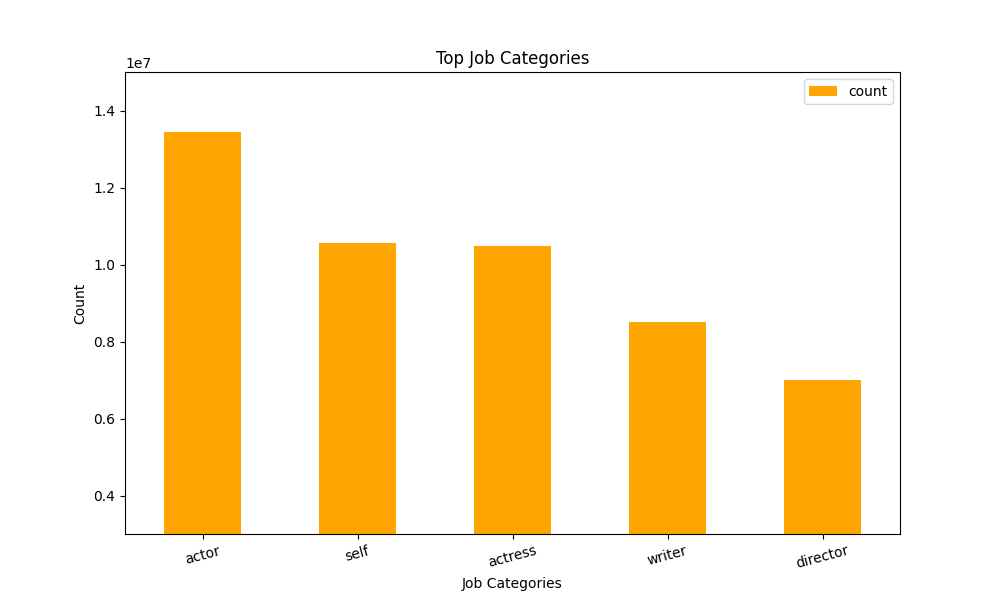

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

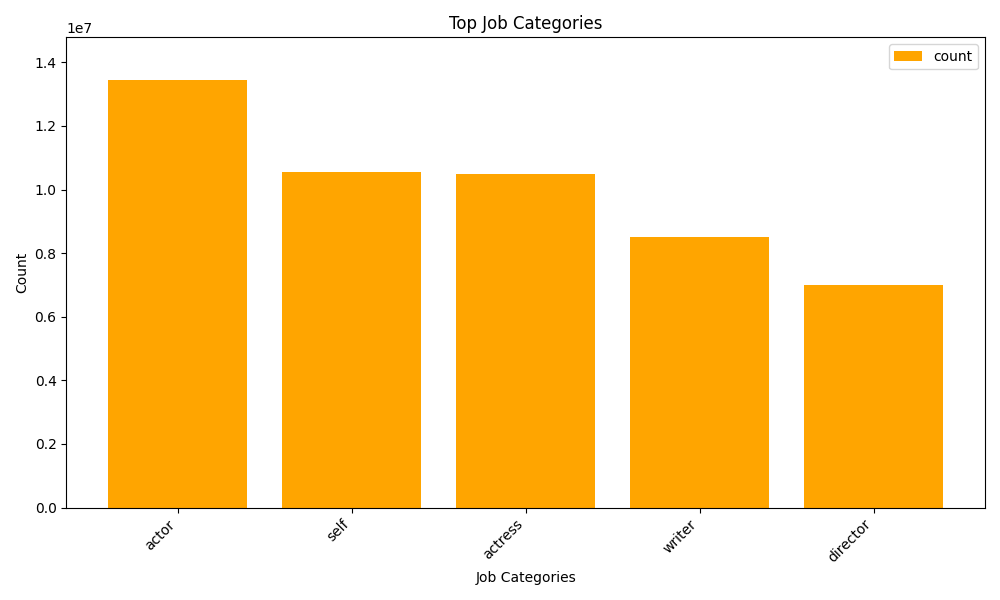

In [28]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas
top_categories = principles.groupBy("category").count().orderBy("count", ascending=False).toPandas()

# Limit to top 5 
top_categories = top_categories.head(5)
# Get max count to set custom Y-axis limit with padding
y_max = top_categories['count'].max()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_categories['category'], top_categories['count'], color='orange', label='count')

# Labels and title
plt.xlabel("Job Categories")
plt.ylabel("Count")
plt.title("Top Job Categories")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, y_max * 1.1)
# Add legend
plt.legend()
plt.tight_layout()
%matplot plt

# PART 4 - Answer to the following questions:

1) You will need to join tables to answer the following questions. Not every question will require four tables. You need to find out which tables will be needed for each question.
2) Your code should meet all the requirements asked in the questions. All of the arguments given in the question should be used in your query design. You will need to figure out how or why these arguments are needed. 
3) Your code should be generalizable enough for any given arguments.
4) Your output should match the output given in the table in the same format

I'd suggest writing and running your code cell by cell if it's possible. These questions will take more time to run. 

Before joining tables, try to filter necessary arguments to reduce the size of the data sets. Otherwise, join() will take more time. 

Or, you can also store a joined table that includes all the tables and then use it for the questions that need all four tables. 

You can create multiple cells for each of the questions. You do not have to do everything in one cell.

You can use print() for some of the outcomes.

## 1) Which movies, released in 2003, have received more than 50,000 votes and have an average rating of 8 or higher?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------------------+-------+---------------+
|Movie                                                 |Ratings|Number of Votes|
+------------------------------------------------------+-------+---------------+
|The Lord of the Rings: The Return of the King         |9.0    |1965196        |
|Oldboy                                                |8.3    |630695         |
|Kill Bill: Vol. 1                                     |8.2    |1184605        |
|Finding Nemo                                          |8.2    |1106772        |
|Pirates of the Caribbean: The Curse of the Black Pearl|8.1    |1202458        |
|Munna Bhai M.B.B.S.                                   |8.1    |87972          |
|Memories of Murder                                    |8.1    |213610         |
|Spring, Summer, Fall, Winter... and Spring            |8.0    |86510          |
|Dogville                                              |8.0    |157921         |
|Big Fish                   

In [29]:

movies_2003 = titles.filter(
    (col("titleType") == "movie") & (col("startYear") == 2003)
)

# join  ratings on 'tconst'
merged = movies_2003.join(ratings, on="tconst")


filtered = merged.filter(
    (col("numVotes") > 50000) & (col("averageRating") >= 8.0)
)


result = filtered.select(
    col("primaryTitle").alias("Movie"),
    col("averageRating").alias("Ratings"),
    col("numVotes").alias("Number of Votes")
).orderBy(col("Ratings").desc())


result.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------------------+-------+---------------+
|Movie                                                 |Ratings|Number of Votes|
+------------------------------------------------------+-------+---------------+
|The Lord of the Rings: The Return of the King         |9.0    |1965196        |
|Oldboy                                                |8.3    |630695         |
|Finding Nemo                                          |8.2    |1106772        |
|Kill Bill: Vol. 1                                     |8.2    |1184605        |
|Memories of Murder                                    |8.1    |213610         |
|Pirates of the Caribbean: The Curse of the Black Pearl|8.1    |1202458        |
|Munna Bhai M.B.B.S.                                   |8.1    |87972          |
|Spring, Summer, Fall, Winter... and Spring            |8.0    |86510          |
|Dogville                                              |8.0    |157921         |
|Big Fish                   

## 2) List the films featuring Cillian Murphy as an actor since 2007, including their ratings. What is his highest-rated movie?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------+----+----------+
|Movies                 |Year|Avg Rating|
+-----------------------+----+----------+
|Small Things Like These|2024|7.2       |
|Kensuke's Kingdom      |2023|7.1       |
|Oppenheimer            |2023|8.4       |
|A Quiet Place Part II  |2020|7.2       |
|Anna                   |2019|6.6       |
|Anthropoid             |2016|7.2       |
|Free Fire              |2016|6.3       |
|In the Heart of the Sea|2015|6.9       |
|Aloft                  |2014|5.3       |
|Transcendence          |2014|6.2       |
|Red Lights             |2012|6.2       |
|In Time                |2011|6.7       |
|Retreat                |2011|5.8       |
|Peacock                |2010|6.2       |
|Perrier's Bounty       |2009|6.3       |
|Waveriders             |2008|6.8       |
|Sunshine               |2007|7.2       |
|Watching the Detectives|2007|6.2       |
+-----------------------+----+----------+

Highest rated movie: Oppenheimer with a rating of 8.4

In [30]:
from pyspark.sql.functions import col

# Load name.basics.new.tsv correctly from S3
names = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.new.tsv',
                       sep=r'\t', header=True, nullValue="\\N", inferSchema=True)


cillian = names.filter(col("primaryName") == "Cillian Murphy")

# get titles  acted in
cillian_roles = cillian.join(principles, on="nconst").filter(col("category") == "actor")


cillian_movies = cillian_roles.join(titles, on="tconst") \
    .filter((col("startYear") >= 2007) & (col("titleType") == "movie"))

# join with ratings and get average rating
cillian_movies_with_ratings = cillian_movies.join(ratings, on="tconst")

result = cillian_movies_with_ratings.select(
    col("primaryTitle").alias("Movies"),
    col("startYear").alias("Year"),
    col("averageRating").alias("Avg Rating")
).orderBy(col("Year").desc(), col("Avg Rating"))


result.show(truncate=False)


highest = result.orderBy(col("Avg Rating").desc()).limit(1)


top_movie = highest.collect()[0]


title = top_movie["Movies"]
rating = top_movie["Avg Rating"]


print(f"Highest rated movie: {title} with a rating of {rating}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------+----+----------+
|Movies                 |Year|Avg Rating|
+-----------------------+----+----------+
|Small Things Like These|2024|7.2       |
|Kensuke's Kingdom      |2023|7.1       |
|Oppenheimer            |2023|8.4       |
|A Quiet Place Part II  |2020|7.2       |
|Anna                   |2019|6.6       |
|Free Fire              |2016|6.3       |
|Anthropoid             |2016|7.2       |
|In the Heart of the Sea|2015|6.9       |
|Aloft                  |2014|5.3       |
|Transcendence          |2014|6.2       |
|Red Lights             |2012|6.2       |
|Retreat                |2011|5.8       |
|In Time                |2011|6.7       |
|Peacock                |2010|6.2       |
|Perrier's Bounty       |2009|6.3       |
|Waveriders             |2008|6.8       |
|Watching the Detectives|2007|6.2       |
|Sunshine               |2007|7.2       |
+-----------------------+----+----------+

Highest rated movie: Oppenheimer with a rating of 8.4

## 3) How many movies has Zendaya featured as an actress in each year?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+
|Year|Total|
+----+-----+
|2024|2    |
|2021|3    |
|2018|2    |
|2017|1    |
+----+-----+

In [31]:
from pyspark.sql.functions import col, count




# Filter for Zendaya
zendaya = names.filter(col("primaryName") == "Zendaya")

# get roles 
zendaya_roles = zendaya.join(principles, on="nconst").filter(col("category") == "actress")

# Join with title.basics to get movie info
zendaya_movies = zendaya_roles.join(titles, on="tconst") \
    .filter((col("titleType") == "movie") & (col("startYear").isNotNull()))


movies_per_year = zendaya_movies.groupBy("startYear").agg(count("*").alias("Total"))


result = movies_per_year.withColumnRenamed("startYear", "Year") \
                        .orderBy(col("Year").desc())


result.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+
|Year|Total|
+----+-----+
|2024|    2|
|2021|    3|
|2018|    2|
|2017|    1|
+----+-----+

## 4) At what age did Audrey Hepburn, who is featured in the movie 'Breakfast at Tiffany's,' pass away?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Audrey Hepburn passed away at the age of 64.

In [32]:

audrey = names.filter(col("primaryName") == "Audrey Hepburn").select("birthYear", "deathYear")


row = audrey.collect()[0]
birth = row["birthYear"]
death = row["deathYear"]

if birth is not None and death is not None:
    age = int(death) - int(birth)
    print(f"Audrey Hepburn passed away at the age of {age}.")
else:
    print("Birth or death year not available.")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Audrey Hepburn passed away at the age of 64.

## 5) What is the movie(s) with the highest average rating among those featuring Chris Evans, known for his role in 'Captain America: The First Avenger'?

Write your code in a way that it finds and displays all movies with the highest rating, even if there's more than one. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+------------------+
|Movies                |Highest Avg Rating|
+----------------------+------------------+
|Avengers: Infinity War|8.4               |
|Avengers: Endgame     |8.4               |
+----------------------+------------------+

In [33]:
from pyspark.sql.functions import col, max as spark_max

#  Chris Evans
chris = names.filter(col("primaryName") == "Chris Evans")


chris_roles = chris.join(principles, on="nconst").filter(col("category") == "actor")

# join  title info
chris_movies = chris_roles.join(titles, on="tconst").filter(col("titleType") == "movie")


chris_rated = chris_movies.join(ratings, on="tconst")

#the highest rating
max_rating = chris_rated.agg(spark_max(col("averageRating"))).collect()[0][0]
# Step 6: Filter movies with that rating
top_movies = chris_rated.filter(col("averageRating") == max_rating)

#  rename for final output
result = top_movies.select(
    col("primaryTitle").alias("Movies"),
    col("averageRating").alias("Highest Avg Rating")
)


result.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+------------------+
|Movies                |Highest Avg Rating|
+----------------------+------------------+
|Avengers: Infinity War|8.4               |
|Avengers: Endgame     |8.4               |
+----------------------+------------------+

## 6) What are the movies in which both Johnny Depp and Helena Bonham Carter have acted together?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|Common Movies                                 |
+----------------------------------------------+
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Charlie and the Chocolate Factory             |
|Corpse Bride                                  |
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
+----------------------------------------------+

In [34]:

# Get  nconsts
depp = names.filter(col("primaryName") == "Johnny Depp")
carter = names.filter(col("primaryName") == "Helena Bonham Carter")


depp_movies = depp.join(principles, on="nconst").select("tconst")
carter_movies = carter.join(principles, on="nconst").select("tconst")

# Find intersection
common_movies = depp_movies.intersect(carter_movies)

common_titles = common_movies.join(titles, on="tconst") \
    .filter(col("titleType") == "movie") \
    .select(col("primaryTitle").alias("Common Movies")) \
    .orderBy("Common Movies") \
    .limit(6)


common_titles.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|Common Movies                                 |
+----------------------------------------------+
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Charlie and the Chocolate Factory             |
|Corpse Bride                                  |
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
+----------------------------------------------+

## 7) What are the highest and lowest-rated movies in the Harry Potter franchise featuring Daniel Radcliffe, and what are their ratings?

First, get the ratings for each movie in the franchise, and then find the highest and lowest-rated movies.

Hint: Google contains() or rlike() functions in Pyspark.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------+-------------+
|primaryTitle                                |averageRating|
+--------------------------------------------+-------------+
|Harry Potter and the Half-Blood Prince      |7.6          |
|Harry Potter and the Prisoner of Azkaban    |7.9          |
|Harry Potter and the Deathly Hallows: Part 2|8.1          |
|Harry Potter and the Deathly Hallows: Part 1|7.7          |
|Harry Potter and the Chamber of Secrets     |7.4          |
|Harry Potter and the Goblet of Fire         |7.7          |
|Harry Potter and the Sorcerer's Stone       |7.6          |
|Harry Potter and the Order of the Phoenix   |7.5          |
+--------------------------------------------+-------------+

Highest Rating in the Harry Potter Franchise: Harry Potter and the Deathly Hallows: Part 2  with a rating of 8.1
Lowest Rating in the Harry Potter Franchise:  Harry Potter and the Chamber of Secrets with a rating of 7.4

In [40]:
from pyspark.sql.functions import col, max as spark_max, min as spark_min
from pyspark.sql.functions import when



daniel = names.filter(col("primaryName") == "Daniel Radcliffe")

# Find movies he acted in
daniel_roles = daniel.join(principles, on="nconst").filter(col("category") == "actor")

# Join with titles to get movie info
daniel_movies = daniel_roles.join(titles, on="tconst") \
    .filter(col("titleType") == "movie")


harry_potter_movies = daniel_movies.filter(col("primaryTitle").rlike("Harry Potter"))

# Join with ratings
harry_potter_rated = harry_potter_movies.join(ratings, on="tconst")

hp_result = harry_potter_rated.select("primaryTitle", "averageRating", "startYear") \
                              .orderBy(col("startYear"))


# Add a custom sort index
ordered_result = hp_result.withColumn(
    "sort_order",
    when(col("primaryTitle") == "Harry Potter and the Half-Blood Prince", 1)
    .when(col("primaryTitle") == "Harry Potter and the Prisoner of Azkaban", 2)
    .when(col("primaryTitle") == "Harry Potter and the Deathly Hallows: Part 2", 3)
    .when(col("primaryTitle") == "Harry Potter and the Deathly Hallows: Part 1", 4)
    .when(col("primaryTitle") == "Harry Potter and the Chamber of Secrets", 5)
    .when(col("primaryTitle") == "Harry Potter and the Goblet of Fire", 6)
    .when(col("primaryTitle") == "Harry Potter and the Sorcerer's Stone", 7)
    .when(col("primaryTitle") == "Harry Potter and the Order of the Phoenix", 8)
)

# Sort by custom order
ordered_result = ordered_result.orderBy("sort_order")

# Show only title and rating
ordered_result.select("primaryTitle", "averageRating").show(truncate=False)



# Get highest-rated movie
top_row = hp_result.orderBy(col("averageRating").desc()).limit(1).collect()[0]
print(f"Highest Rating in the Harry Potter Franchise: {top_row['primaryTitle']} with a rating of {top_row['averageRating']}")


low_row = hp_result.orderBy(col("averageRating").asc()).limit(1).collect()[0]
print(f"Lowest Rating in the Harry Potter Franchise: {low_row['primaryTitle']} with a rating of {low_row['averageRating']}")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------+-------------+
|primaryTitle                                |averageRating|
+--------------------------------------------+-------------+
|Harry Potter and the Half-Blood Prince      |7.6          |
|Harry Potter and the Prisoner of Azkaban    |7.9          |
|Harry Potter and the Deathly Hallows: Part 2|8.1          |
|Harry Potter and the Deathly Hallows: Part 1|7.7          |
|Harry Potter and the Chamber of Secrets     |7.4          |
|Harry Potter and the Goblet of Fire         |7.7          |
|Harry Potter and the Sorcerer's Stone       |7.6          |
|Harry Potter and the Order of the Phoenix   |7.5          |
+--------------------------------------------+-------------+

Highest Rating in the Harry Potter Franchise: Harry Potter and the Deathly Hallows: Part 2 with a rating of 8.1
Lowest Rating in the Harry Potter Franchise: Harry Potter and the Chamber of Secrets with a rating of 7.4